## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Dataset

In [2]:
df=pd.read_csv('pima_indians_diabetes.csv')

In [4]:
df.columns=["Pregnancies","Glucose","BloodPressure","SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Class"]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
Pregnancies                 767 non-null int64
Glucose                     767 non-null int64
BloodPressure               767 non-null int64
SkinThickness               767 non-null int64
Insulin                     767 non-null int64
BMI                         767 non-null float64
DiabetesPedigreeFunction    767 non-null float64
Age                         767 non-null int64
Class                       767 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.842243,120.859192,69.101695,20.517601,79.903520,31.990482,0.471674,33.219035,0.348110
std,3.370877,31.978468,19.368155,15.954059,115.283105,7.889091,0.331497,11.752296,0.476682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.371000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,127.500000,36.600000,0.625000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Exploratory Data Analysis

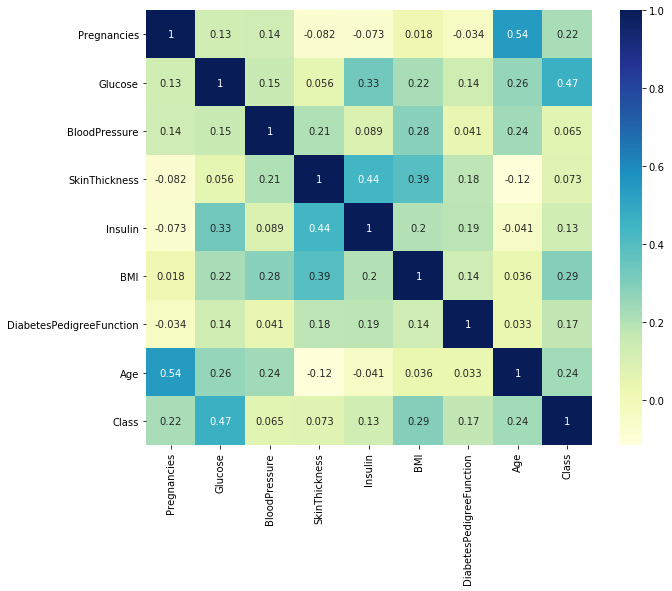

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")

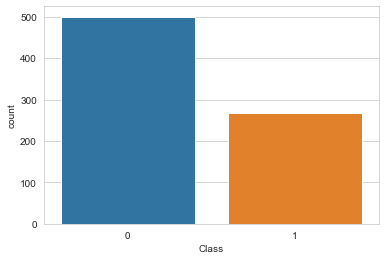

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Class',data=df)

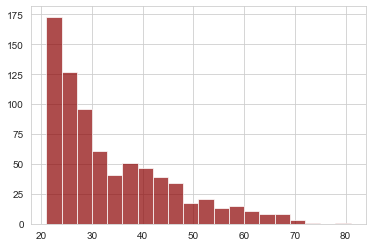

In [14]:
df['Age'].hist(bins=20, color='darkred',alpha=0.7)

## Train Test Split

In [15]:
X=df.drop('Class', axis=1)
y=df['Class']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

## Train the Naive Bayes Classifier

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
nb= GaussianNB()

In [33]:
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Predictions and Evaluations

In [34]:
predictions= nb.predict(X_test)

In [35]:
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[122  28]
 [ 36  45]]


              precision    recall  f1-score   support

           0       0.77      0.81      0.79       150
           1       0.62      0.56      0.58        81

    accuracy                           0.72       231
   macro avg       0.69      0.68      0.69       231
weighted avg       0.72      0.72      0.72       231

